<a id=0></a>
# 9.Regression Models
※　代表的な回帰分析モデルの紹介  
※　モデルの評価、交差検証、パラメータのグリッドサーチ

---
### [1. 探索的データ分析（EDA）](#1)
### [2. LinearRegression](#2)
### [3. RandomForestRegressor](#3)
### [4. KNeighborsRegressor](#4)
### [5. モデルの評価](#5)
### [6. クロスバリデーションとグリッドサーチ](#6)
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context='talk', style='darkgrid', font='MS GOTHIC')

---
<a id=1></a>
[Topへ](#0)

---
## 1. 探索的データ分析（EDA）¶

* 糖尿病のデータセット
* 分布の確認
* 相関関係
* トレインデータ、テストデータ

糖尿病のデータセット

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
diabetes = load_diabetes()

In [4]:
# このようにndarrayとして取り出して使っていくこともできる
X, y = load_diabetes(return_X_y=True)

In [5]:
X[:5]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665645,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02269202, -0.00936191],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187235,  0.00393485,
         0.01559614,  0.00814208, -0.00259226, -0.03199144, -0.04664087]])

In [6]:
Xy = np.concatenate([X, y.reshape(-1, 1)], axis=1)

In [7]:
Xy.shape

(442, 11)

In [8]:
type(diabetes['feature_names'])
# listであるため、足し合わせで合成することができる

list

In [9]:
df = pd.DataFrame(Xy, columns=diabetes['feature_names'] + ['target'])
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [10]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [12]:
df.describe()
# meanはほぼ０で揃っている

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [13]:
# カテゴリカルなsexを確認
df['sex'].unique()

array([ 0.05068012, -0.04464164])

分布の確認

In [14]:
def plot_data(feature):
    fig, axes = plt.subplots(1, 3, figsize=(16, 4), tight_layout=True)
    # sex別に分布を確認
    sns.histplot(data=df, x=feature, hue='sex', multiple='dodge', ax=axes[0])
    # 長いレジェンドを非表示に
    axes[0].legend([], frameon=False)
    # sex別に分布、外れ値を確認
    sns.boxplot(data=df, x='sex', y=feature, width=0.5, ax=axes[1])
    # 長いラベルを非表示に
    axes[1].set_xticklabels([])
    # targetとの関係を確認
    sns.scatterplot(data=df, x=feature, y=y, hue='sex', alpha=0.7, ax=axes[2])
    axes[2].legend([], frameon=False)
    plt.suptitle(feature)
    plt.show()

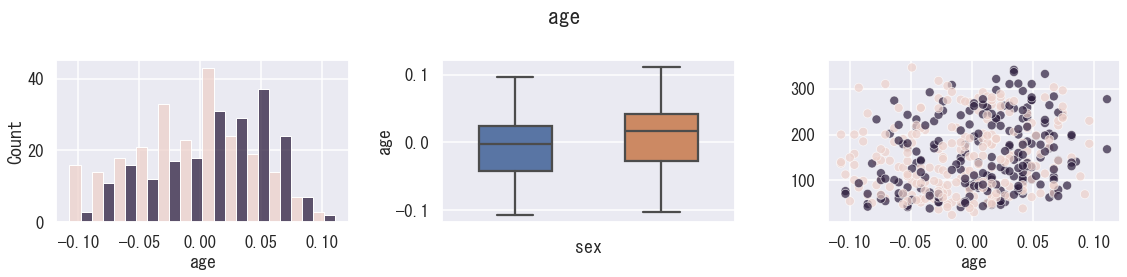

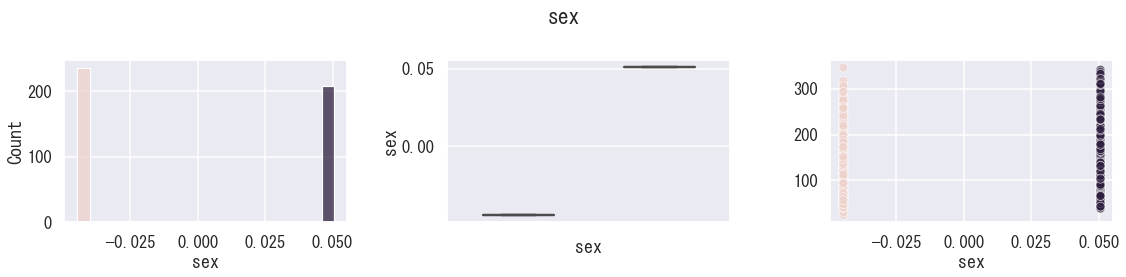

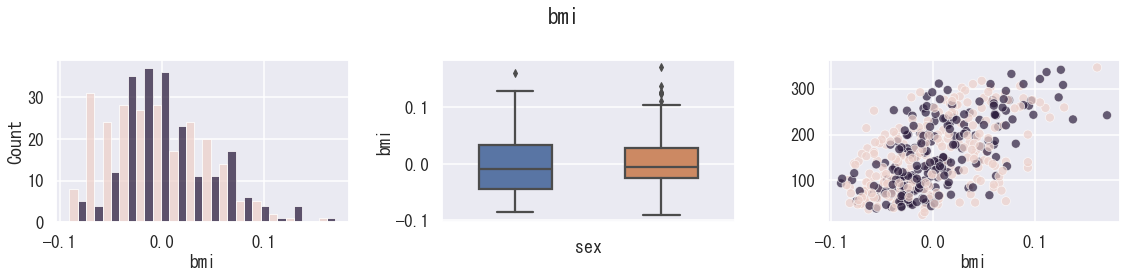

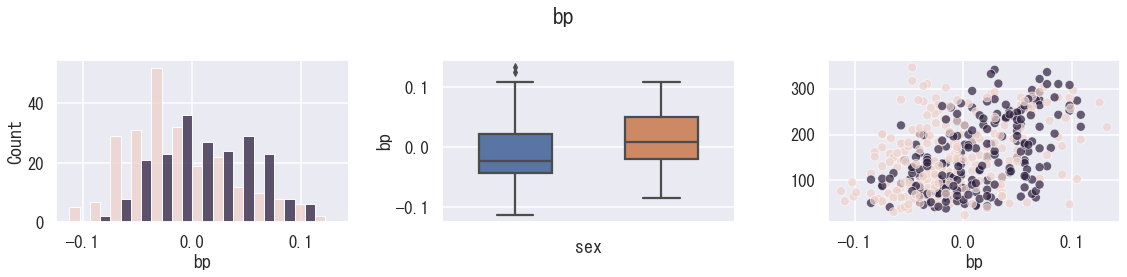

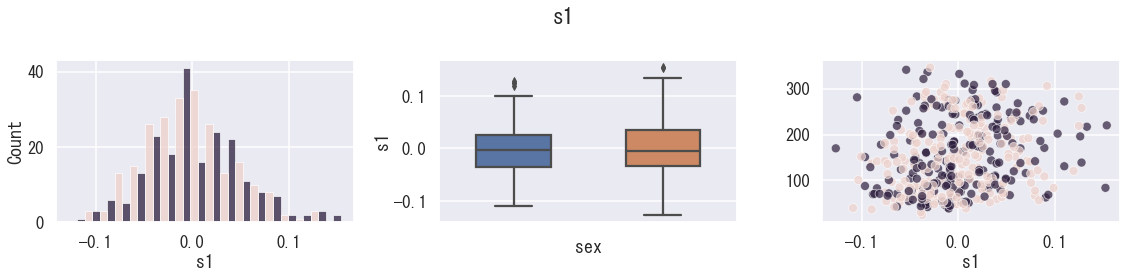

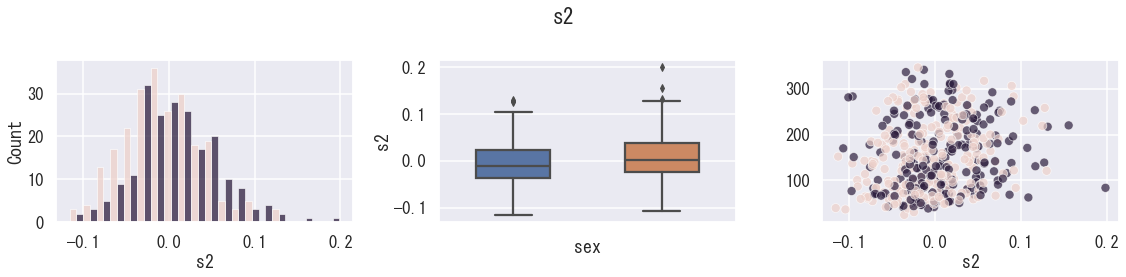

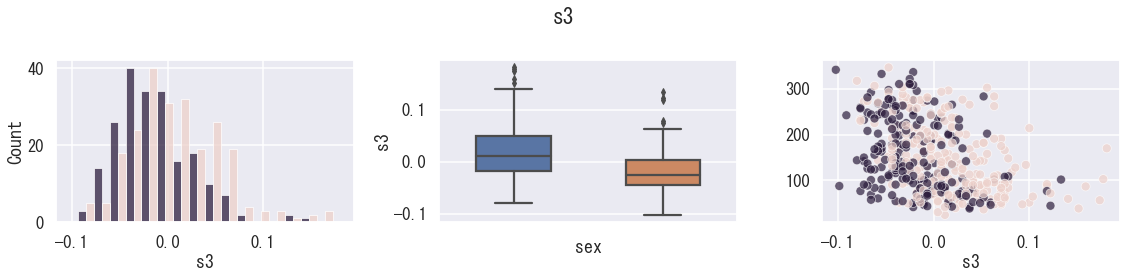

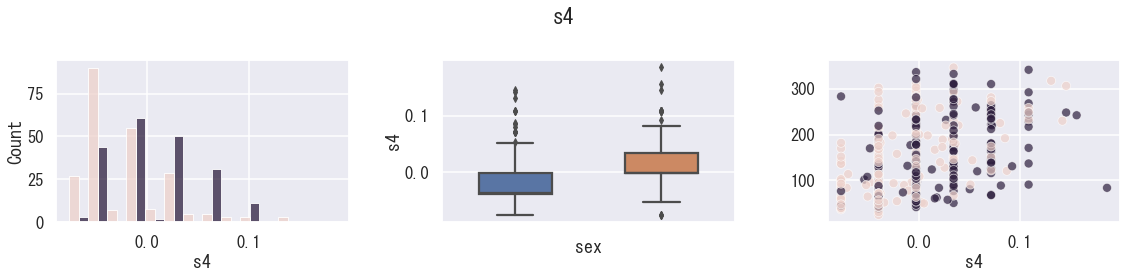

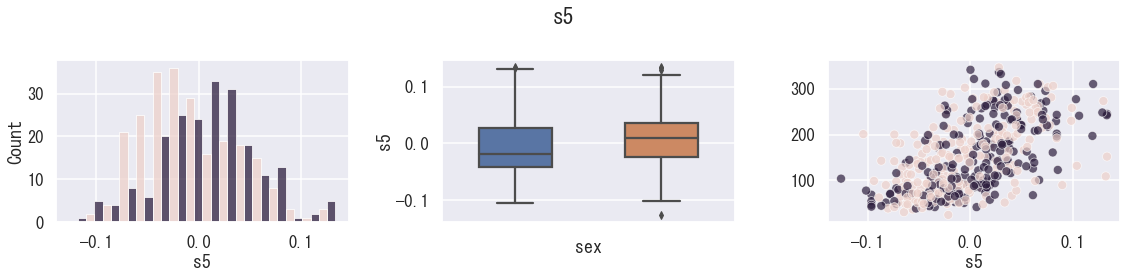

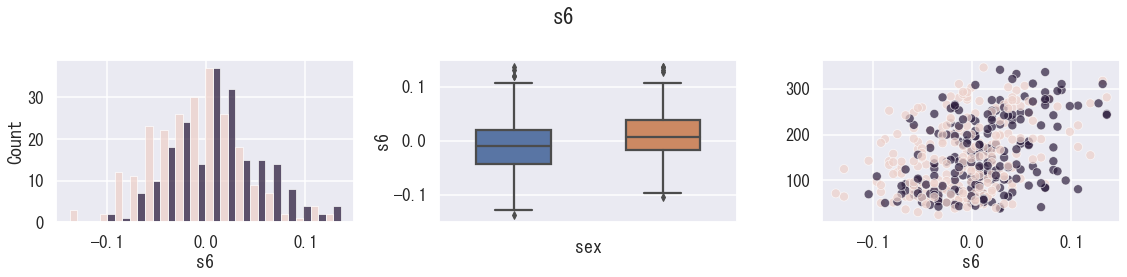

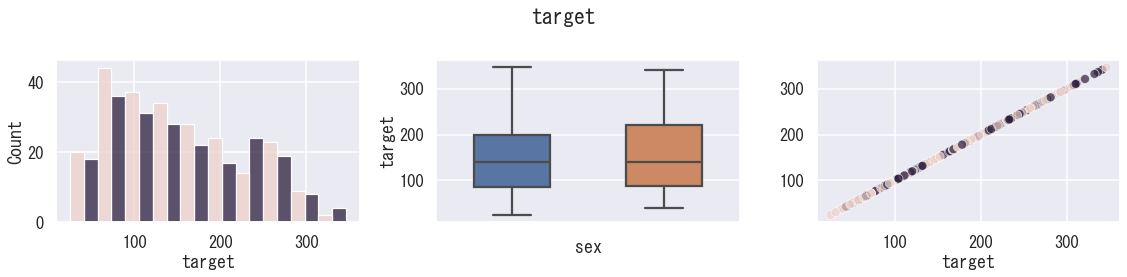

In [15]:
for feature in df.columns:
    plot_data(feature)

相関関係

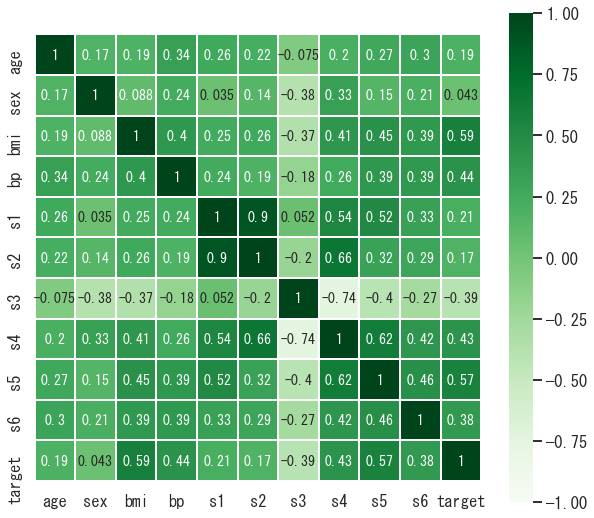

In [16]:
plt.figure(figsize=(10, 9))
sns.heatmap(df.corr(), annot=True, annot_kws={'size':14}, cmap='Greens', square=True, linewidth=1, vmin=-1)
plt.show()

性別で分けてみる

In [17]:
df_s0 = df[df['sex'] > 0].drop(columns=['sex'], axis=0)
df_s1 = df[df['sex'] < 0].drop(columns=['sex'], axis=0)

In [18]:
df_s0.head()

,age,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
2,0.085299,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
6,-0.045472,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357,138.0
7,0.063504,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064,63.0
8,0.041708,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349,110.0


トレインデータ、テストデータ

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17, shuffle=True)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((309, 10), (133, 10), (309,), (133,))

In [22]:
X0_train, X0_test, y0_train, y0_test = train_test_split(df_s0.iloc[:, :-1], df_s0.iloc[:, -1], test_size=0.3, random_state=17)

In [23]:
X1_train, X1_test, y1_train, y1_test = train_test_split(df_s1.iloc[:, :-1], df_s1.iloc[:, -1], test_size=0.3, random_state=17)

---
<a id=2></a>
[Topへ](#0)

---
## 2. LinearRegression

* モデルのインポート  
    https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html  
* モデルインスタンスの作成
* モデルの構築・属性・予測・スコア
* 性別ごとのデータで試してみる
---

モデルのインポート

In [24]:
from sklearn.linear_model import LinearRegression

モデルインスタンスの作成

In [25]:
# パラメータの変更はほぼ必要ない
lr_model = LinearRegression()

モデルの構築・属性・予測・スコア

In [26]:
# 訓練データに対して適合、学習させる
lr_model.fit(X_train, y_train)

LinearRegression()

In [27]:
# 予測を行う
lr_pred = lr_model.predict(X_test)
lr_pred

array([177.43223878, 235.01037059,  95.43301332, 100.93538118,
       100.65715032,  66.43275867, 113.84256267, 104.45927809,
       150.21249092,  63.99346763, 230.7550845 , 128.83545866,
       104.13292547, 118.67270387, 184.97380936, 266.66399481,
       177.13351418, 152.08899838, 256.2470075 , 178.51259385,
       194.5726978 , 244.8807276 , 199.4411976 ,  95.40278232,
       134.05047593, 192.57260147,  61.06411694, 167.0139164 ,
        67.6206225 , 250.83781704, 136.70774124,  39.61752949,
        75.5138669 , 214.16854679, 139.59574643, 173.96368935,
        54.40700963, 211.30490198,  96.30575342, 202.66384061,
        81.80665303, 110.36382491, 183.80069178, 251.39356665,
       144.94558056,  79.05011705, 229.58170867, 121.58414168,
       192.45334413, 179.6379283 , 177.54461296, 158.79262076,
       169.81538897, 137.8276442 , 162.05830036, 144.30479373,
        99.81563556, 316.4529431 , 139.850685  , 173.16468524,
       163.56415493, 213.23088024,  50.21129793, 144.75

In [28]:
# 係数、傾き
lr_model.coef_

array([  31.55514455, -366.72198741,  490.82256554,  305.02396489,
        -12.93866473, -211.39772345, -221.57711266,  219.13169897,
        497.67353032,   62.88243801])

In [29]:
# 切片
lr_model.intercept_

151.9906855254699

In [30]:
test = np.array([ 0.7076875, -0.04464164, 0.01211685, 0.04252958, 0.07135654, 0.0534871 , 0.05232174, -0.00259226,  0.02539313, -0.0052198 ]).reshape(1, -1)

pred_0 = lr_model.predict(test)
pred_0

array([197.53030131])

In [31]:
# y = a1x1 + a2x2 + ... + a10x10 + b
pred_1 = lr_model.intercept_  # 切片だけ

# 係数＊値を足し合わせていく
for i in range(10):
    pred_1 += lr_model.coef_[i] * test[0, i]

pred_1

197.53030131226998

実測値と予測値の比較

In [32]:
df_result = pd.DataFrame()
df_result['true_value'] = y_test
df_result['prediction'] = lr_pred
df_result['residual'] = y_test - lr_pred
# true_valueで昇順に並べ替え
df_result_sorted = df_result.sort_values('true_value', ignore_index=True)

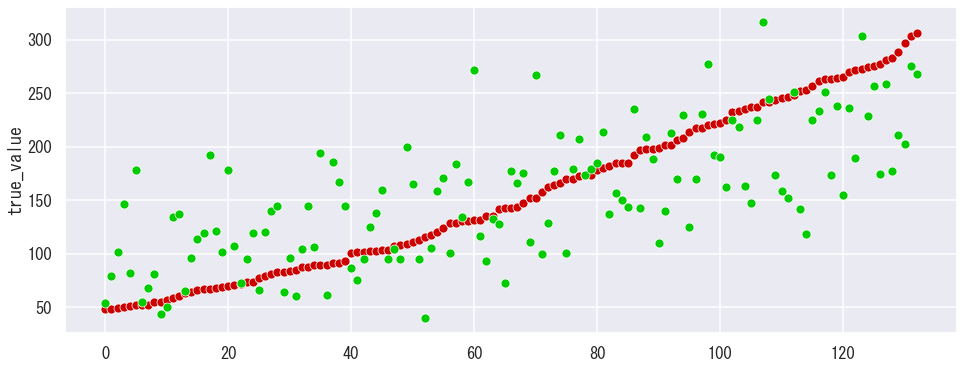

In [33]:
plt.figure(figsize=(16, 6))
sns.scatterplot(data=df_result_sorted, x=df_result_sorted.index, y='true_value', color='#c00')
sns.scatterplot(data=df_result_sorted, x=df_result_sorted.index, y='prediction', color='#0c0')
plt.show()

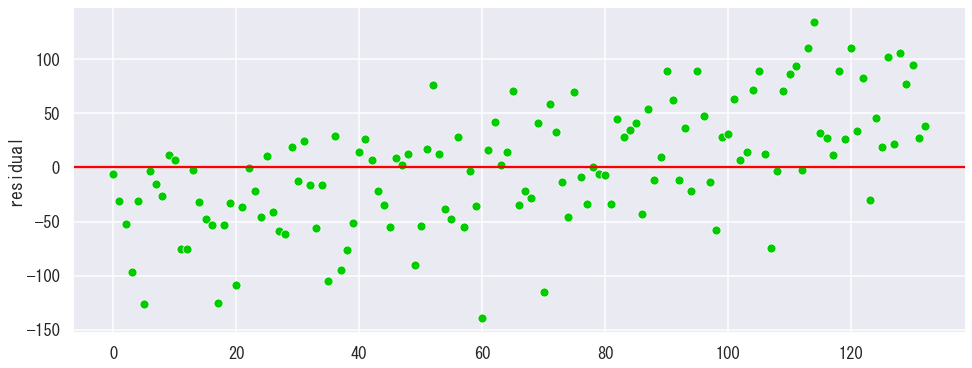

In [34]:
plt.figure(figsize=(16, 6))
sns.scatterplot(data=df_result_sorted, x=df_result_sorted.index, y='residual', color='#0c0')
plt.axhline(0, color="#f00")
plt.show()

In [35]:
# このスコアはR二乗値、R２スコア
lr_model.score(X_test, y_test)

0.46530989908008846

In [36]:
# fitに用いたデータに対しても過度に高い数値にはならなかった
lr_model.score(X_train, y_train)

0.5213200910396503

性別ごとのデータで試してみる

In [37]:
# こちらの性別ではテストでも0.547という結果を得ることができた
lr_model_s0 = LinearRegression()
lr_model_s0.fit(X0_train, y0_train)
lr_model_s0.score(X0_test, y0_test), lr_model_s0.score(X0_train, y0_train)

(0.5472068416331968, 0.5955477131039737)

In [38]:
lr_model_s1 = LinearRegression()
lr_model_s1.fit(X1_train, y1_train)
lr_model_s1.score(X1_test, y1_test), lr_model_s1.score(X1_train, y1_train)

(0.5210346528733196, 0.4558515085876368)

---
<a id=3></a>
[Topへ](#0)

---
## 3. RandomForestRegressor

* モデルのインポート  
    https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html 
* モデルインスタンスの作成
* モデルの構築・属性・予測・スコア
* パラメータを変更してみる
* Treeの可視化
---

モデルのインポート

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# アンサンブルとは複数人で演奏すること

モデルインスタンスの作成

In [ ]:
rf_model = RandomForestRegressor(
    n_estimators=100,   # DecisionTreeRegressorの数
    max_depth=None,   # 分岐を最大何回まで行うか
    min_samples_split=2,    # サンプルが最小いくつまで分岐を行うか（最小であり、達する前に止まることもある）
    min_samples_leaf=1,   # 末端での最小のサンプル数
    max_features=1.0,   # 最大いくつの特徴量を使うか。「最大」なので1.0の場合はすべて使うことも1割を使うこともある
    bootstrap=True,   # 多様性を増やすためのサンプルのランダムな割り当て
    random_state=17,
    max_samples=None   # bootstrap=Trueの場合のサンプルの最大数。0-1.0で指定すればよい
)

モデルの構築・属性・予測・スコア

In [ ]:
rf_model.fit(X_train, y_train)

In [ ]:
rf_pred = rf_model.predict(X_test)
rf_pred[:5]

In [ ]:
# estimatorを確認
rf_model.base_estimator_

In [ ]:
# 重要度の高さを取得
# index=8, 's5'が最も重要のよう
rf_model.feature_importances_

In [ ]:
rf_model.score(X_test, y_test)

In [ ]:
rf_model.score(X_train, y_train)
# 訓練データに対しては過度に高い精度。新規、未知のデータには精度が低い => 過学習(overfitting)している
# 汎化性能(新規のデータに対しても同程度の精度がある)が低い

パラメータを変更してみる

In [ ]:
# 特に根拠があるわけではない変更です
rf_model_new = RandomForestRegressor(
    n_estimators=120,   # DecisionTreeRegressorの数
    max_depth=4,   # 分岐を最大何回まで行うか
    min_samples_split=5,    # サンプルが最小いくつまで分岐を行うか（最小であり、達する前に止まることもある）
    min_samples_leaf=1,   # 末端での最小のサンプル数
    max_features=0.6,   # 最大いくつの特徴量を使うか。「最大」なので1.0の場合はすべて使うことも1割を使うこともある
    bootstrap=True,   # 多様性を増やすためのサンプルのランダムな割り当て
    random_state=17,
    max_samples=0.7   # bootstrap=Trueの場合のサンプルの最大数。0-1.0で指定すればよい
)

In [ ]:
rf_model_new.fit(X_train, y_train)
rf_pred_new = rf_model_new.predict(X_test)
rf_pred_new[:5]

In [ ]:
rf_model_new.score(X_test, y_test)

In [ ]:
rf_model_new.score(X_train, y_train)
# 過学習が抑えられ（？）、さらに汎化性能もわずかに向上したと考えられる

Treeの可視化

In [ ]:
# ひとつ目のDecisionTreeRegressor
rf_model.estimators_[0]

In [ ]:
from sklearn.tree import plot_tree

In [ ]:
plt.figure(figsize=(18, 20))
plot_tree(rf_model.estimators_[0], max_depth=2, fontsize=24, feature_names=diabetes['feature_names'], filled=True)
# filled:色分け
plt.show()

---
<a id=4></a>
[Topへ](#0)

---
## 4. KNeighborsRegressor

* モデルのインポート  
     https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html  
* モデルインスタンスの作成・スコア
* パラメータを変更してみる
---

モデルのインポート

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

モデルインスタンスの作成・スコア

In [ ]:
kn_model = KNeighborsRegressor(n_neighbors=5, weights='uniform')
# 近傍、類似の5つのデータから数値を予測する
# 'distance'は距離の近い、遠いで重みづけを変える

In [ ]:
kn_model.fit(X_train, y_train)
kn_pred = kn_model.predict(X_test)
kn_pred[:5]

In [ ]:
kn_model.score(X_test, y_test)

In [ ]:
kn_model.score(X_train, y_train)

パラメータを変更してみる

In [ ]:
kn_model_new = KNeighborsRegressor(n_neighbors=12, weights='uniform')

In [ ]:
kn_model_new.fit(X_train, y_train)

In [ ]:
kn_model_new.score(X_test, y_test)

In [ ]:
kn_model_new.score(X_train, y_train)

---
<a id=5></a>
[Topへ](#0)

---
## 5. モデルの評価方法

* 評価指標
* モデルを評価する
* R2スコア(決定係数)とは
---

評価指標  
絶対平均誤差　/　二乗平均誤差　/　絶対パーセント誤差　/　R二乗値（決定係数）

In [ ]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

モデルを評価する  

In [ ]:
def eval_models(models, X_train, y_train, X_test, y_test):
    for model in models:
        model.fit(X_train, y_train)
        pred = np.round(model.predict(X_test))
        score = np.round(model.score(X_test, y_test), 4)
        mae = np.round(mean_absolute_error(y_test, pred), 4)
        mse = np.round(mean_squared_error(y_test, pred), 4)   # 2乗するため、誤差の大きさが目立つようになる
        mape = np.round(mean_absolute_percentage_error(y_test, pred), 4)   # 予測値のスケールに寄らず、相対的に理解できる
        r2 = np.round(r2_score(y_test, pred), 4)
        print(f'{model}')
        print(f'score : {score}, mae : {mae}, mse : {mse}, mape : {mape}, r2 : {r2}')
        print('================================')
        
# model.score()とr2_score()は同じもの

In [ ]:
models = [lr_model, rf_model_new, kn_model_new]
eval_models(models, X_train, y_train, X_test, y_test)

R2スコア(決定係数)とは

* R2 = 1 - Σ{( true_value(i) - pred(i) ) ** 2} / Σ{( true_value(i) - true_value_mean ) ** 2}
* 1に近いほど回帰式の精度が高い
* もし、すべてを「平均」で予想した場合(最も安易な？予想)　=> R2 = 0
* 0.5以上：予測精度がそれなりに高いと言える
* 0.7以上：予測精度が高い
* 0.9以上：精度が非常に高い。ただし、過学習でないかの検討も必要  
※　絶対的な基準は存在しません。あくまでも目安として用いる指標です

---
<a id=6></a>
[Topへ](#0)

---
## 6. クロスバリデーションとグリッドサーチ

* KFold  
    https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
* cross_val_score  
    https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
* GridSearchCV  
    https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
---

KFold

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
k = KFold(5, shuffle=True, random_state=17)

In [ ]:
set1, set2, set3, set4, set5 = k.split(X)

In [ ]:
# トレイン、テスト
set1

In [ ]:
len(set1[0]), len(set1[1])

In [ ]:
# ８：２で分割される
89 / 442

cross_val_score

In [ ]:
# 5つの組の平均値で比較する
for model in models:
    scores = cross_val_score(model, X, y, cv=k)
    print(f'{model} : {scores.mean()}')
    print('\n')

GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# rf_modelのパラメータを変更する
# max_depth=4, min_samples_split=5, max_features=0.6, max_samples=0.7
params = {
    'max_depth':[2, 6, 10],
    'max_features':[0.5, 0.9],
    'max_samples':[0.5, 0.9],
    'min_samples_split':[3, 6]
}
# 計２４の組み合わせで結果を取得できる

In [ ]:
grid = GridSearchCV(rf_model, param_grid=params)
# return_train_score=Falseでトレインデータのスコアも確認できる

In [ ]:
grid.fit(X, y)

In [ ]:
# データフレームで結果を表示
pd.DataFrame(grid.cv_results_)

In [ ]:
pd.DataFrame(grid.cv_results_).loc[:, 'params':].sort_values('rank_test_score', ascending=True)

In [ ]:
# 最適なパラメータ
grid.best_params_

---
 <a id=4></a>
[Topへ](#0)

---
## 以上
    
---